In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("summer_2016_medals.csv")
df_new = df.drop(columns = ['ID', 'Name', 'Event'])
df_new.head()

,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Medal
0,M,21,198,90,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Bronze
1,F,21,165,49,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Bronze
2,M,31,182,86,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Silver
3,M,26,170,80,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,Bronze
4,M,24,161,62,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Silver


In [ ]:
df['Medal'].nunique()

3

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_new.columns:
    if (df_new[col].dtype == 'object'):
        df_new[col] = le.fit_transform(df_new[col])
df_new.head()

,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Medal
0,1,21,198,90,46,41,0,2016,0,0,19,0
1,0,21,165,49,5,5,0,2016,0,0,26,0
2,1,31,182,86,31,28,0,2016,0,0,14,2
3,1,26,170,80,43,38,0,2016,0,0,33,0
4,1,24,161,62,72,67,0,2016,0,0,13,2


In [ ]:
df_new.describe()

,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Medal
count,2014.000000,2014.000000,2014.000000,2014.00000,2014.000000,2014.000000,2014.0,2014.0,2014.0,2014.0,2014.000000,2014.000000
mean,0.519861,26.337637,178.373386,73.96574,47.895730,41.802880,0.0,2016.0,0.0,0.0,15.588381,0.976167
std,0.499729,5.143563,11.882251,16.21923,29.057954,25.621677,0.0,0.0,0.0,0.0,9.685716,0.819186
min,0.000000,15.000000,140.000000,33.00000,0.000000,0.000000,0.0,2016.0,0.0,0.0,0.000000,0.000000
25%,0.000000,23.000000,170.000000,63.00000,24.000000,20.000000,0.0,2016.0,0.0,0.0,7.000000,0.000000
50%,1.000000,26.000000,178.000000,72.00000,46.000000,34.000000,0.0,2016.0,0.0,0.0,15.000000,1.000000
75%,1.000000,29.000000,186.000000,83.75000,74.000000,67.000000,0.0,2016.0,0.0,0.0,23.000000,2.000000
max,1.000000,58.000000,215.000000,160.00000,97.000000,85.000000,0.0,2016.0,0.0,0.0,33.000000,2.000000


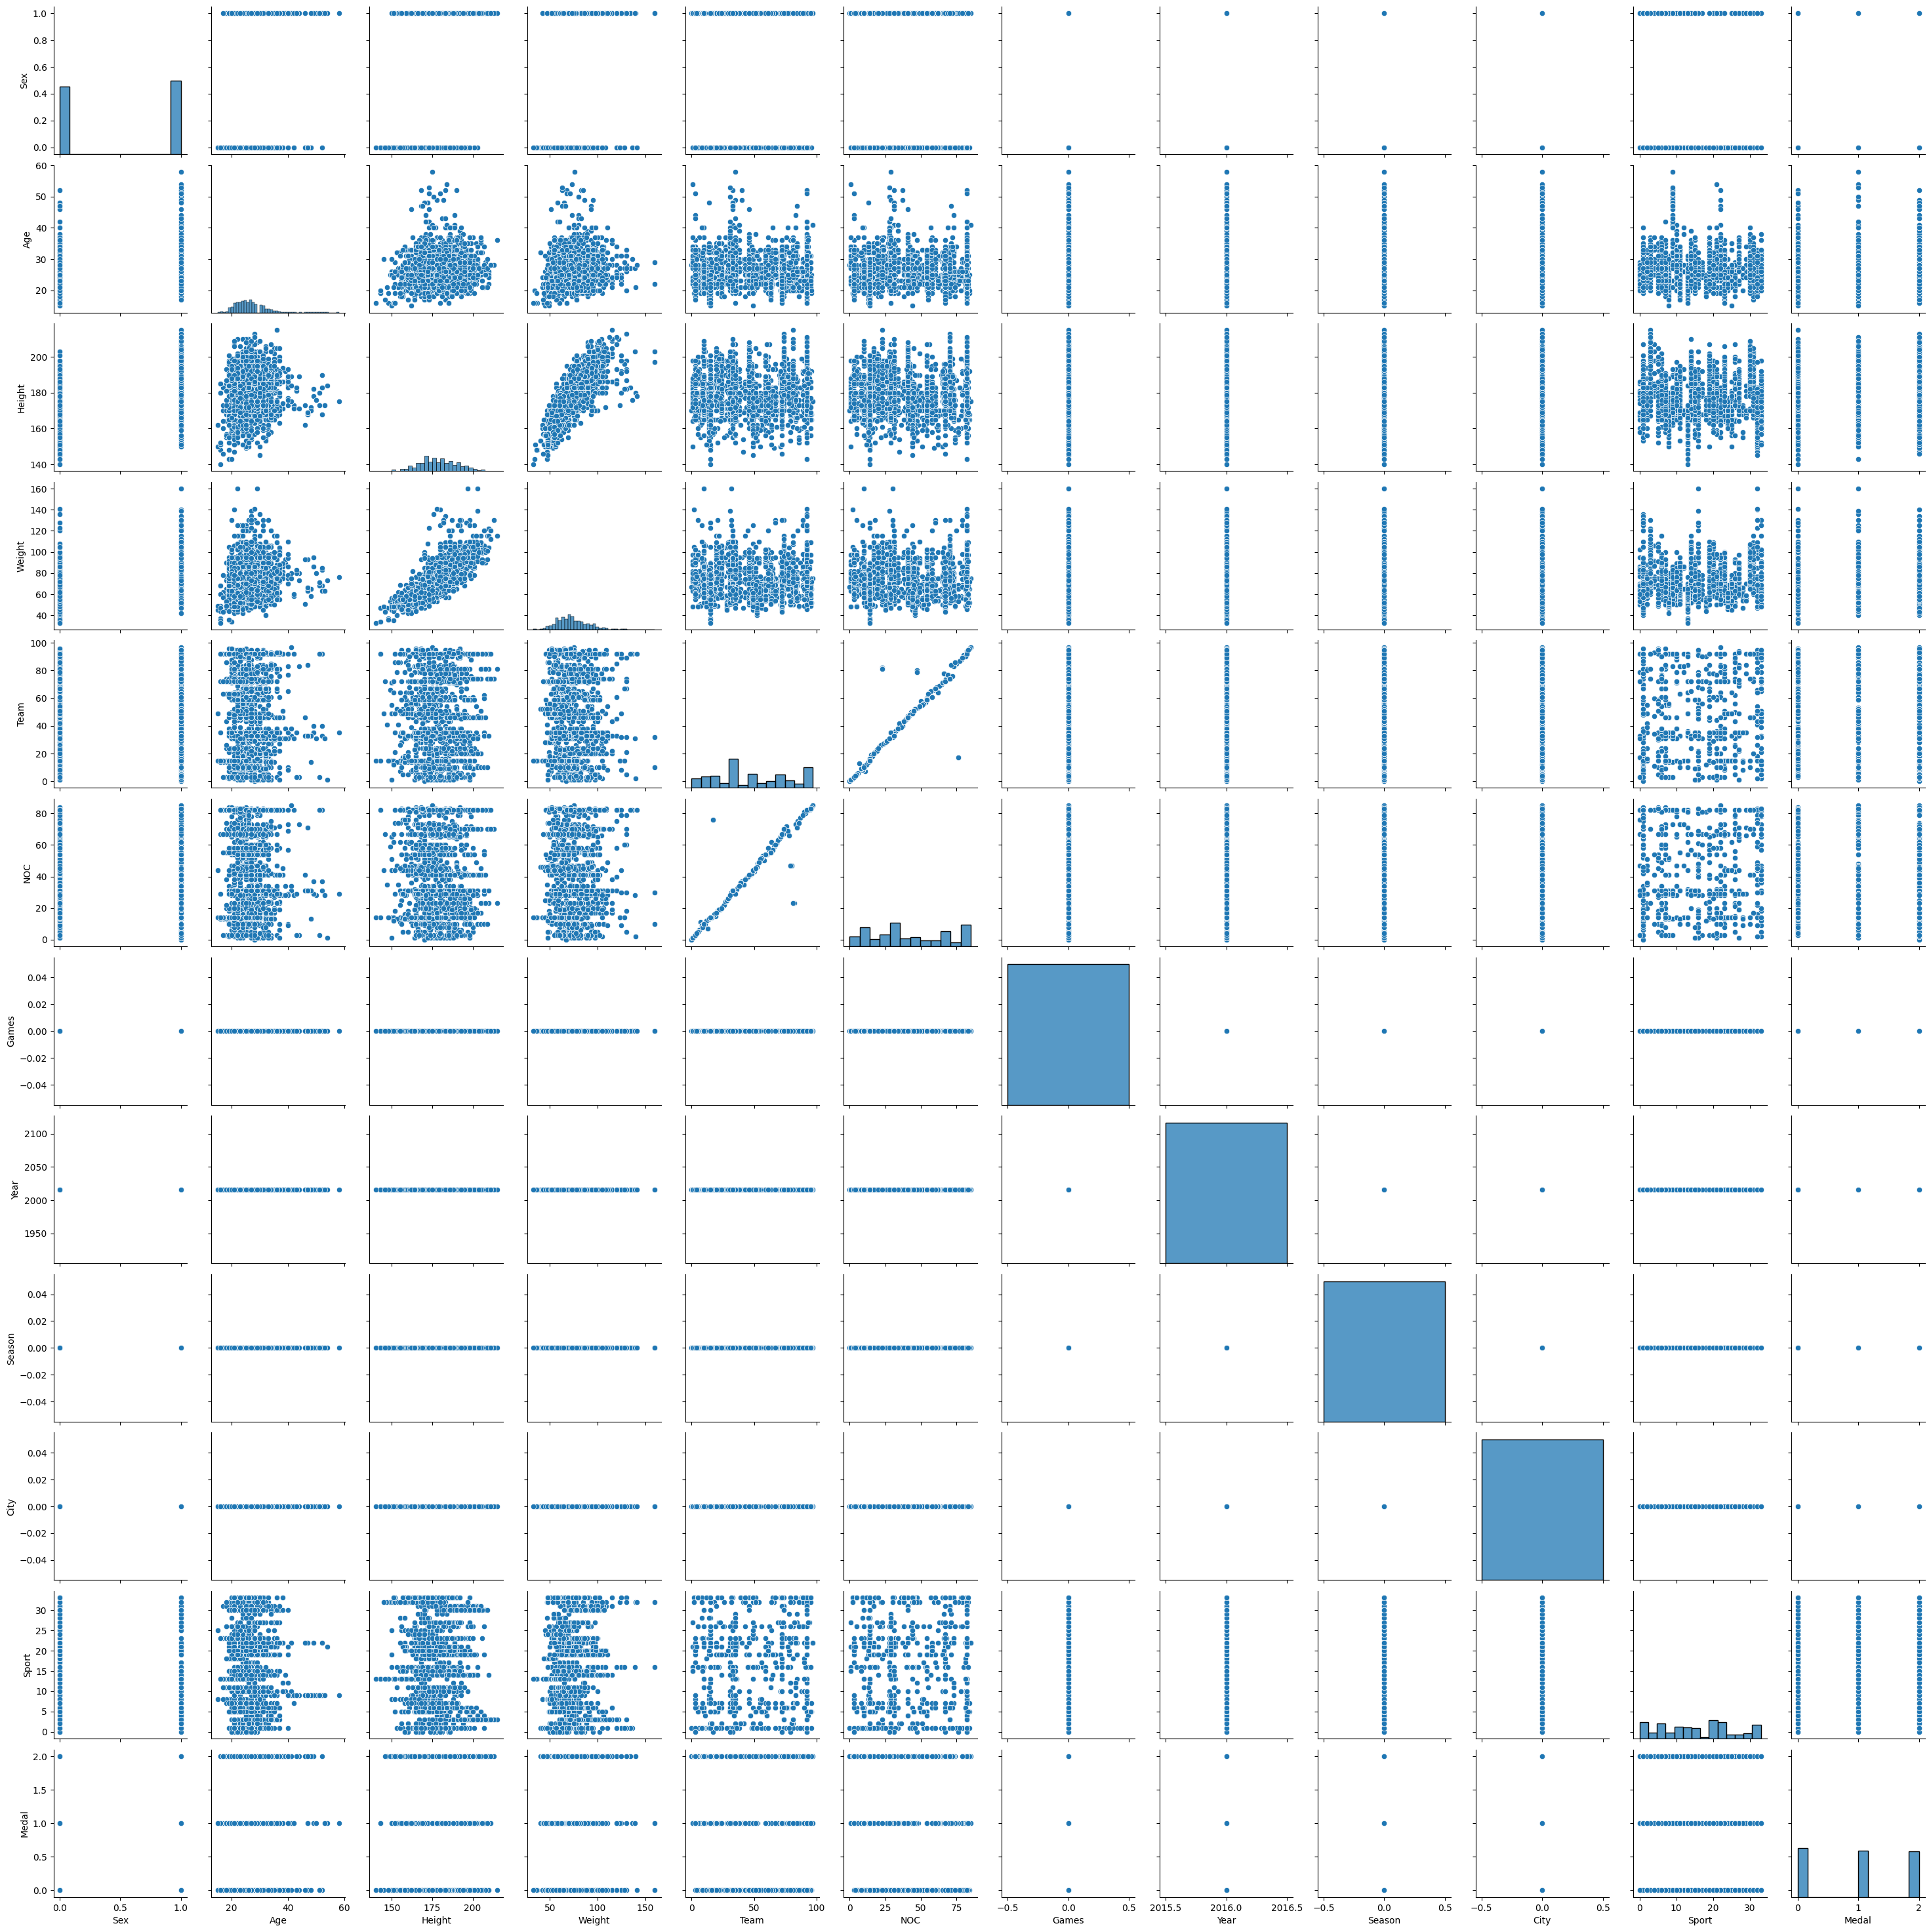

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_new)

In [ ]:
df_medals = df_new.drop(columns = ['City', 'Height', 'NOC', 'Team', 'Season', 'Games'])
df_medals.head()

,Sex,Age,Weight,Year,Sport,Medal
0,1,21,90,2016,19,0
1,0,21,49,2016,26,0
2,1,31,86,2016,14,2
3,1,26,80,2016,33,0
4,1,24,62,2016,13,2


In [ ]:
X = df_medals.drop(columns = ['Medal'])
y = df_medals['Medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3598014888337469

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = LogisticRegression(), n_features_to_select=2, verbose = 1)
rfe.fit(X_train, y_train)

Fitting estimator with 5 features.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)

In [ ]:
X.columns[rfe.support_]
dict(zip(X.columns, rfe.ranking_))

{'Sex': np.int64(1),
 'Age': np.int64(1),
 'Weight': np.int64(2),
 'Year': np.int64(4),
 'Sport': np.int64(3)}

In [ ]:
accuracy_score(y_test, rfe.predict(X_test))

0.337468982630273

In [ ]:
lr.coef_

array([[ 3.72198785e-03, -6.64622828e-03, -8.97697343e-04,
         1.15799268e-04,  2.52008743e-03],
       [-2.95523507e-03,  8.06370577e-03,  1.69995778e-03,
        -1.72199772e-04, -2.57405686e-04],
       [-7.66752777e-04, -1.41747749e-03, -8.02260433e-04,
         5.64005037e-05, -2.26268174e-03]])

In [ ]:
dict(zip(X.columns, abs(lr.coef_[0])))

{'Sex': np.float64(0.003721987851452369),
 'Age': np.float64(0.006646228283191754),
 'Weight': np.float64(0.0008976973432618311),
 'Year': np.float64(0.00011579926813744022),
 'Sport': np.float64(0.002520087430420744)}

In [ ]:
df_medals.drop(columns = ['Year'])

,Sex,Age,Weight,Sport,Medal
0,1,21,90,19,0
1,0,21,49,26,0
2,1,31,86,14,2
3,1,26,80,33,0
4,1,24,62,13,2
...,...,...,...,...,...
2009,0,21,78,30,1
2010,0,28,72,30,2
2011,1,23,52,5,1
2012,1,27,73,6,2
